In [11]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import pytesseract

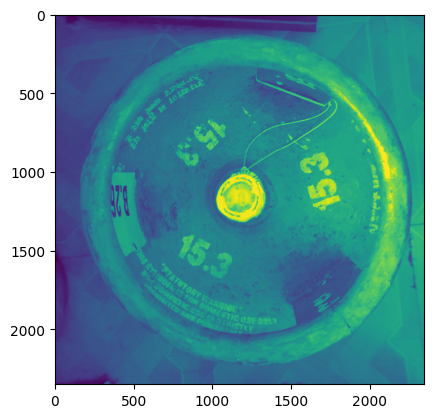

In [12]:
img= cv2.imread('./images/Cylinder_image.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_gray)

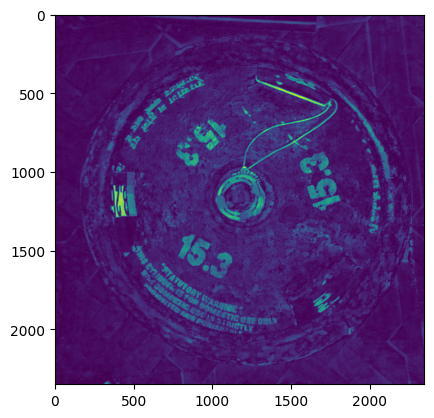

In [13]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (50, 50))
tophat = cv2.morphologyEx(img_gray, cv2.MORPH_TOPHAT, kernel)
plt.imshow(tophat)

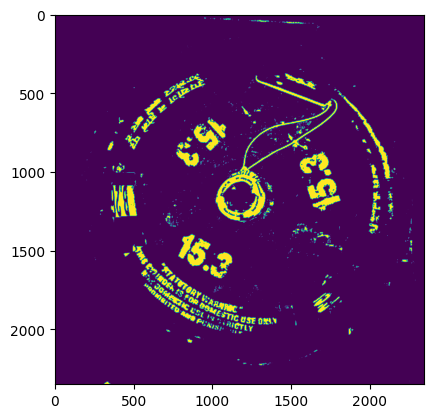

In [14]:
_, binary_image = cv2.threshold(tophat, 35, 255, cv2.THRESH_BINARY)
plt.imshow(binary_image)

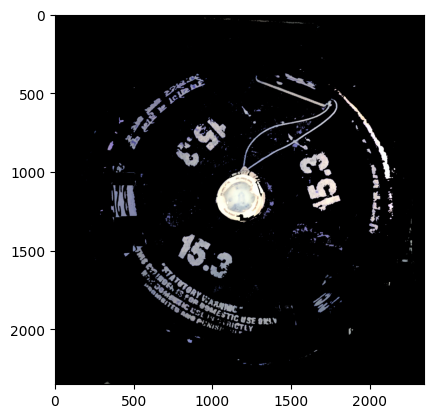

In [15]:
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
mask = np.zeros_like(img_gray)
cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)
result = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(result)

In [16]:
# angle = 130

# # Get the image dimensions
# height, width = result.shape[:2]

# # Calculate the rotation matrix
# rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), angle, 1)

# # Perform rotation using warpAffine
# rotated_image = cv2.warpAffine(result, rotation_matrix, (width, height))

# plt.imshow(rotated_image)

In [17]:
# x = 900
# y = 1470
# width = 500
# height = 250

# # Crop the image based on the ROI coordinates
# cropped_image = rotated_image[y:y+height, x:x+width]
# recognized_text = pytesseract.image_to_string(cropped_image, config='--psm 10 --oem 3 -c tessedit_char_whitelist=0123456789')
# print("Recognized Number:", recognized_text)
# # Save the cropped image as a separate file
# plt.imshow(cropped_image)


In [18]:
angle = 0
x = 900
y = 1470
width = 500
height = 250
# Get the image dimensions
height2, width2 = result.shape[:2]
numbers = []
while (angle < 360):
    # Calculate the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D((width2/2, height2/2), angle, 1)

    # Perform rotation using warpAffine
    rotated_image = cv2.warpAffine(result, rotation_matrix, (width2, height2))
    cropped_image = rotated_image[y:y+height, x:x+width]
    recognized_text = pytesseract.image_to_string(cropped_image, config='--psm 10 --oem 3 -c tessedit_char_whitelist=0123456789')
    if(recognized_text != None):
        recognized_text = str(recognized_text).strip()
        if(recognized_text != ''):
            numbers.append(int(recognized_text.strip()))
    angle+=10
print(numbers)

[2, 152, 9, 8]


In [19]:
cropped_numbers = [num for num in numbers if 100 <= num <= 200]
print(cropped_numbers)

[152]


In [20]:
max_number = max(cropped_numbers)
final_weight = max_number / 10
print(final_weight)

15.2
